In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
a=datetime.now()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

import re
from sklearn.feature_extraction.text import CountVectorizer


# <font color = 'chartreuse'> Import, Clean Data

In [3]:
with open("constitution.txt","r", encoding="utf-8") as f:
    corpus = f.read()

corpus=re.sub(r"\n"," ",corpus)

# stops = stopwords.words("english")
print(len(corpus.split(' ')))

#word ~ 7505 words
# python split() ~ 7641 

def clean_stops(doc,stops):
    #regex scrubber:
    final=[]
    clean=re.sub(r"AC\/\d{1,4}\/\d{1,4}", "",doc)
    # clean=clean.translate(str.maketrans("","",string.punctuation))
    for token in clean.split():
        if token not in stops:
            final.append(token)

    final=" ".join(final)
    return final

def clean_docs(docs):
    stops = stopwords.words("english")
    final=[]
    for doc in docs:
        final.append(clean_stops(doc,stops))
    return final

clean = clean_docs(corpus.split())

clean_sents = clean_docs(corpus.split("."))


7641


# <font color = 'chartreuse'> Vectorize Corpus:

In [5]:
cv = CountVectorizer()
CV1 = cv.fit_transform(clean_sents)
vectorizer = TfidfVectorizer(lowercase=True, 
                             max_features=100, 
                             max_df = 0.8,
                             min_df = 5, 
                             ngram_range=(1,5),
                             stop_words = "english")

vectors = vectorizer.fit_transform(clean_sents)

feature_names = vectorizer.get_feature_names_out()
print(feature_names)

dense = vectors.todense()
dense_list = dense.tolist()

print(len(dense_list[1]))

['amendment' 'amendment section' 'appointed' 'appropriate'
 'appropriate legislation' 'article' 'authority' 'case' 'cases' 'choice'
 'chosen' 'citizens' 'citizens united' 'congress' 'congress shall'
 'congress shall power' 'consent' 'constitution' 'day' 'denied' 'duties'
 'elected' 'election' 'electors' 'enforce' 'enforce article' 'executive'
 'government' 'house' 'house representatives' 'house shall' 'houses'
 'jurisdiction' 'law' 'laws' 'legislation' 'legislature' 'legislatures'
 'majority' 'make' 'manner' 'members' 'necessary' 'number' 'number votes'
 'office' 'office president' 'officers' 'people' 'person' 'person shall'
 'persons' 'power' 'power enforce' 'powers' 'powers duties' 'president'
 'president shall' 'president united' 'president united states'
 'president vice' 'president vice president' 'provide' 'public'
 'representatives' 'representatives shall' 'respective' 'right' 'section'
 'section congress' 'section congress shall' 'senate' 'senate shall'
 'senator' 'senators' 's

In [15]:
from sklearn.decomposition import PCA

TRUE_K = 3
model = KMeans(n_clusters=TRUE_K, init="k-means++", max_iter=100, n_init=1)
model.fit(vectors)
kmean_indices = model.fit_predict(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

# Print Cluster:
i = 0
for cluster in order_centroids:
    print (f"Cluster {i+1}")
    for keyword in cluster[:15]:
    # for keyword in cluster[0:10]:
        print ('\t',terms[keyword])
    print ("")
    i=i+1

Cluster 1
	 president
	 vice president
	 vice
	 president shall
	 senate
	 office
	 number
	 states
	 votes
	 representatives
	 house representatives
	 house
	 person
	 united
	 united states

Cluster 2
	 state
	 law
	 house
	 congress
	 time
	 unless
	 amendment
	 public
	 cases
	 state shall
	 persons
	 election
	 representatives
	 congress shall
	 representatives shall

Cluster 3
	 states
	 united
	 united states
	 section
	 constitution
	 article
	 congress
	 state
	 states shall
	 amendment
	 years
	 power
	 united states shall
	 shall power
	 congress shall power



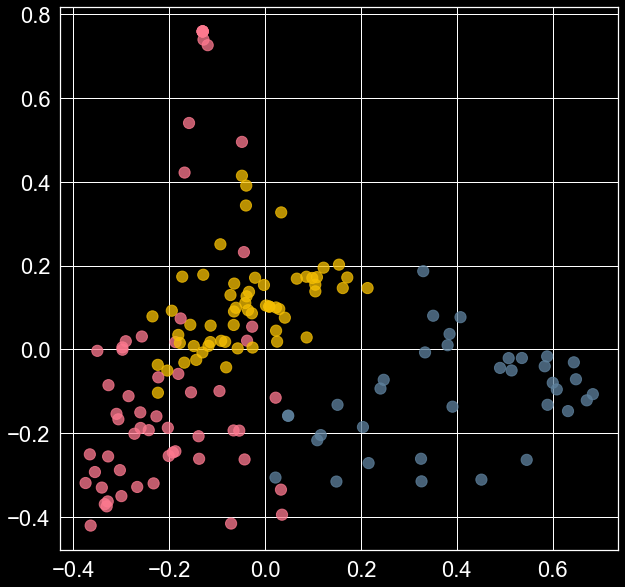

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2.0)
sns.set_palette("magma")
import pylab
pylab.rcParams['figure.figsize'] = (20, 20)
plt.style.use('dark_background')
# import RCG
# colors = list(RCG.nhex(int(TRUE_K)).values)
colors = ["#5e819d","#f5bf03","#fd798f"]
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
# colors=["#aa23ff","#ae7181", "#04d8b2", "#5170d7","#ff9408"]
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices],s=125,alpha=0.76)



# for i, txt in enumerate(names):
#     ax.annotate(txt[0:5], (x_axis[i],y_axis[i]))
    
plt.savefig("KMeans_3_USA_Constitution.png",dpi=122)
plt.show()

